# Data Gathering
Data gathering is sourced from yahoo finance, thru an API called yfinance. It is an open-source tool that uses Yahoo's publicly available APIs, and is intended for research and educational purposes. Selection for this library was decided based on its quick refresh time and free access. Of all of the free libraries it is the one that offers the fastest update time; 2 minutes going back as far as 60 days, for the purpose of this project we consider a 2 minute refresh rate a close proxy to real-time data streaming. However the model that we will present could be further expanded into using paid libraries that offer real time and more accurate data than yfinance.
First we will install yfinance, pmadirma libraries and import numpy, pandas and matplotlib


In [1]:
!pip install yfinance

In [2]:
!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 14.5 MB/s 
     |████████████████████████████████| 9.8 MB 12.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
# We're using standard data preprocessing, data manipulation and data visualisation libraries like pandas, numpy and matplotlib
# We're using pmdarima library to find and build the most suitable ARIMA model
import yfinance as yf
from pmdarima import auto_arima 
import pandas as pd
from pandas.plotting import lag_plot
from sklearn import preprocessing
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt
%matplotlib inline

# Model selection
We can chose any company that is publicly traded introducing their corresponding ticker, select the amount of of historic data that we want to utilize for the model. In the case of the API we can only go as far as 60 days, then select the update refresh rate, the highest we can choose is 2 minutes. We will use Apple as an example for this excercise 'AAPL'

The dataset contains date time updated every 2 minutes, the open price at the beginning of each period, the highest price during that period, lowest price during that period, close price at the end of the period, adjusted close price for the period, and the volume traded during the period. For our model we only need the date time and the close price.

We can visualize the plot for the price for the past 60 days and the price distribution histogram, which revolves around 140 and 160

In [4]:
# We're using yfinance to download Amazon stock data using an API from yahoo finance
df = yf.download(tickers="AAPL", period="60d", interval="2m")
df = df.drop(columns=["Open",	"High",	"Low",	"Adj Close",	"Volume"])
df

[*********************100%***********************]  1 of 1 completed


,Close
Datetime,
2022-04-22 09:30:00-04:00,2974.570068
2022-04-22 09:32:00-04:00,2982.810059
2022-04-22 09:34:00-04:00,2973.500000
2022-04-22 09:36:00-04:00,2975.010010
2022-04-22 09:38:00-04:00,2963.000000
...,...
2022-06-03 15:52:00-04:00,2449.229980
2022-06-03 15:54:00-04:00,2450.199951
2022-06-03 15:56:00-04:00,2447.860107


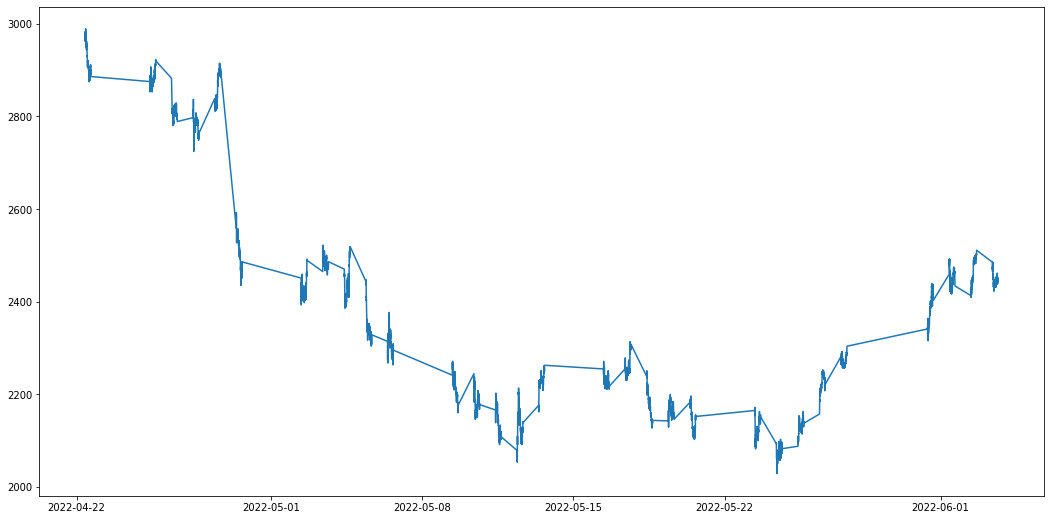

In [5]:
# Plot showing past 60 days of Amazon stock prices
plt.figure(figsize=(18,9))
plt.plot(df.index, df, linestyle="-")
plt.show();

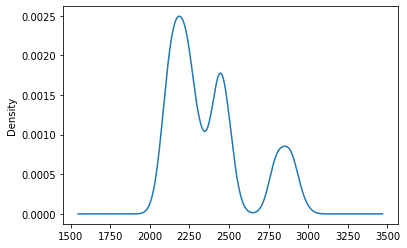

In [6]:
#Distribution of the dataset
df_close = df['Close']
df_close.plot(kind='kde')

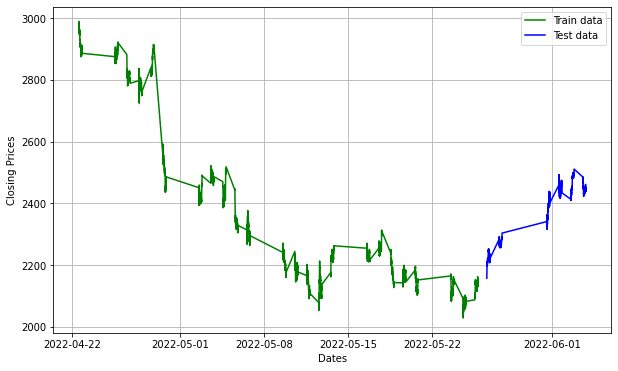

In [7]:
train_data = df[0:int(len(df)*0.8)]
test_data = df[int(len(df)*0.8):]
#split data into train and training set and plot the difference on the graph
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()


In [8]:
print(len(train_data))
print(len(test_data))

4680
1171


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32457.373, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32446.077, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32445.462, Time=1.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32457.863, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=32446.630, Time=3.54 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=32445.715, Time=1.74 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=32443.255, Time=8.70 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=32444.181, Time=11.76 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=32444.033, Time=7.89 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=32443.139, Time=4.75 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=32443.864, Time=1.53 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 42.273 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:     

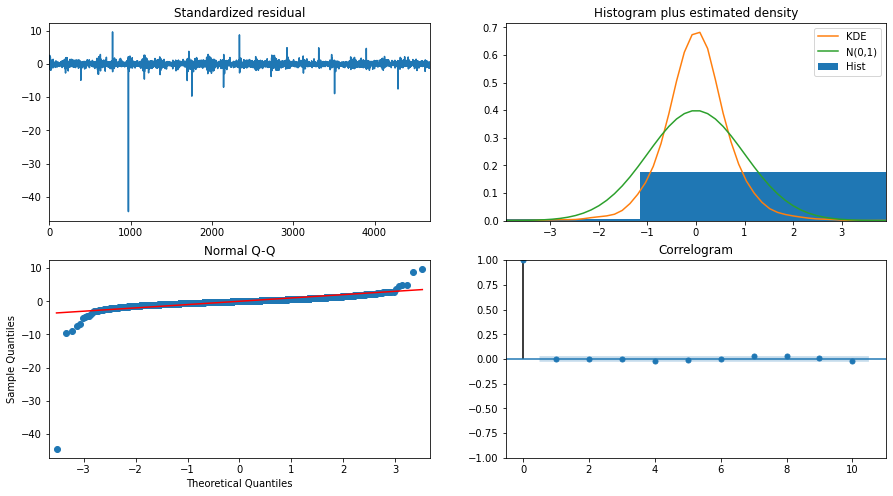

In [9]:
# Looking for the best model that minimizes AIC
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()